# ** heatmap ** 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import matplotlib.patches as mpatches
import numpy as np 
import copy
import json
import pandas as pd

In [2]:
plt.style.use("seaborn-darkgrid")

In [3]:
#initial half model 
model = {'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GAC': [0.38170347003154576, {'GGC': 0.581267217630854, 'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516}], 'TCA': [0.44338655339094774, {'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618, 'TAA': 0.12685827552031714}], 'CCA': [0.4589957500393515, {'CAA': 0.10185185185185185, 'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226}], 'GCC': [0.5527913809990206, {'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702, 'GTC': 0.5985116938341601}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'GCA': [0.49819102749638206, {'GGA': 0.15359477124183007, 'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'AAT': 0.1551043429216018, 'ATT': 0.5964467005076142}], 'TAT': [0.544423228125351, {'TCT': 0.07654219104600785, 'TGT': 0.8021456571074892, 'TTT': 0.12131215184650299}], 'CAG': [0.4073735527117611, {'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346, 'CTG': 0.1480927449513837}], 'AAA': [0.3198252625708709, {'AGA': 0.5239755884917175, 'ATA': 0.17988956698634118, 'ACA': 0.2961348445219413}], 'CCG': [0.943577893317928, {'CAG': 0.01, 'CGG': 0.04673469387755102, 'CTG': 0.943265306122449}], 'CAA': [0.36173285198555954, {'CCA': 0.28493013972055886, 'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296}], 'ACA': [0.5516478655164787, {'AGA': 0.17802726543704891, 'ATA': 0.6555733761026463, 'AAA': 0.16639935846030474}], 'GCT': [0.5081906865451868, {'GAT': 0.16334661354581673, 'GGT': 0.20101412531691415, 'GTT': 0.6356392611372691}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GGG': 0.5530104712041884, 'GCG': 0.21662303664921467}], 'AAT': [0.48758198043221157, {'ACT': 0.1133406835722161, 'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224}], 'GCG': [0.9428571428571428, {'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185, 'GAG': 0.06703397612488522}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CAC': 0.11974567290709998, 'CGC': 0.2352525609325327}], 'ACC': [0.6345660930062248, {'ATC': 0.532602423542989, 'AAC': 0.3147720715522216, 'AGC': 0.15262550490478938}], 'TCT': [0.4717741935483871, {'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228, 'TTT': 0.47611865258924085}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TAG': 0.026896942242355604, 'TTG': 0.9210079275198187}], 'AAC': [0.3978541712283775, {'AGC': 0.6692350027517887, 'ACC': 0.17776554760594387, 'ATC': 0.15299944964226747}], 'GAT': [0.4466903598400711, {'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162, 'GTT': 0.2973644952759821}], 'TAG': [0.38808618504435993, {'TGG': 0.6962769431743958, 'TCG': 0.16525146962769433, 'TTG': 0.13847158719790986}], 'GAA': [0.30323054331864907, {'GGA': 0.5617433414043583, 'GTA': 0.19915254237288135, 'GCA': 0.2391041162227603}], 'CAT': [0.5741935483870968, {'CGT': 0.716724286949006, 'CTT': 0.1497407087294728, 'CCT': 0.13353500432152118}], 'TCC': [0.5196784458214705, {'TGC': 0.22687721559780857, 'TTC': 0.602964872703835, 'TAC': 0.17015791169835642}], 'TAC': [0.4143262045864468, {'TGC': 0.7276119402985075, 'TTC': 0.1455223880597015, 'TCC': 0.12686567164179105}]}
#doubled model 
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}


In [4]:
# def reverse_complement(dna):
#     """
#     Note that this function will revComp everything: need appropruate if conditional to make sure you are 64-->32 not 64--> complementary 64 
#     """
#     complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
#     return "fuck"

# ** heat map using codons only ** 
- going to need: 
    - DNAI dict
    - DNAF dict
    - DNA map dict... 
    - exon insertion dictionary 

In [15]:
file_path_afterSim = ""
sim_name_afterSim = "DifDNA_invarCodon_Trial"
about_sim_finalGen = "_cds_invariant50_999999"
about_sim = "_cds_invariant50"
nTrials= 10 #

In [16]:
DNA_dataDict = {}

#DifDNA800kgen trial 1-5
for index_tmp in range(1,nTrials+1):
    file_name_exondict = sim_name_afterSim+str(index_tmp)+"_exon_insertion_dict.txt"
    file_name_dnaI = sim_name_afterSim+str(index_tmp)+"_DNA_gen0_cds.txt"
    file_name_dnaF = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim_finalGen+".txt"
    file_name_dnamap = sim_name_afterSim+str(index_tmp)+"_DNA_map"+about_sim+".txt"
    
    file_object_exondict = json.loads(open(file_path_afterSim+file_name_exondict).readlines()[0])
    file_object_dnaI = open(file_path_afterSim+file_name_dnaI).readlines()[0]
    file_object_dnaF = open(file_path_afterSim+file_name_dnaF).readlines()[0]
    file_object_dnamap = open(file_path_afterSim+file_name_dnamap).readlines()[0]
    
    DNA_dataDict["Trial"+str(index_tmp)] = [file_object_dnaI, file_object_dnaF, file_object_dnamap, file_object_exondict]   


In [18]:
len(DNA_dataDict["Trial1"])

4

In [19]:
#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)

    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []

    tmp_nCodons = 0

    for exon_bounds_list in DNA_dataDict[trial_name][3].values():

        i = int(exon_bounds_list[0])+1

        tmp_exon_codons = int((int(exon_bounds_list[1]) - int(exon_bounds_list[0]))/3)
        tmp_nCodons += tmp_exon_codons


        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
    
    DNA_dataDict[trial_name].extend([current_codonsI, current_codonsF])
    
       

In [20]:
len(DNA_dataDict["Trial1"])

6

In [30]:
base2_axis = ["_"+base+"_" for base in bases]
print(base2_axis)

base1base3_axis = []
for base1 in bases: 
    for base3 in bases: 
        base1base3_axis.append(base1+"_"+base3)
print(base1base3_axis)

['_T_', '_C_', '_A_', '_G_']
['T_T', 'T_C', 'T_A', 'T_G', 'C_T', 'C_C', 'C_A', 'C_G', 'A_T', 'A_C', 'A_A', 'A_G', 'G_T', 'G_C', 'G_A', 'G_G']


In [22]:
# counting the average and sd of codons 
bases = ["T", "C", "A", "G"]
triplets = []
count_change_dictionary = {}
for base1 in bases: 
    for base2 in bases: 
        for base3 in bases: 
            
            triplet = base1+base2+base3
            triplets.append(triplet)
            count_change_dictionary[triplet] = []
            
            for trial_number in range(1,nTrials+1):
                
                trial_name = "Trial"+str(trial_number)
                
                count_initial = DNA_dataDict[trial_name][4].count(triplet)
                count_final = DNA_dataDict[trial_name][5].count(triplet)
                
                count_change_dictionary[triplet].append(count_final-count_initial)

In [18]:
#count_change_dictionary

In [28]:
#making the list of mean chnage counts for each triplet in the order for "triplets" 
codon_meanChangeCount_array = []
for base1 in bases: 

    for base3 in bases:
        codon_counts_list = []
        
        for base2 in bases: 
            codon = base1+base2+base3
            codon_counts_list.append(np.mean(count_change_dictionary[codon]))
        codon_meanChangeCount_array.append(codon_counts_list)
    

** making the cmap center at 0 ** 

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, codon_meanChangeCount_array, start=0,  stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    
    cmap_counts = []
    for value in codon_meanChangeCount_array: 
        cmap_counts.extend(value)

    cmapmax = max(cmap_counts)
    cmapmin = min(cmap_counts)
    
    midpoint = 1 - cmapmax/(cmapmax - cmapmin)
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(start, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, stop, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

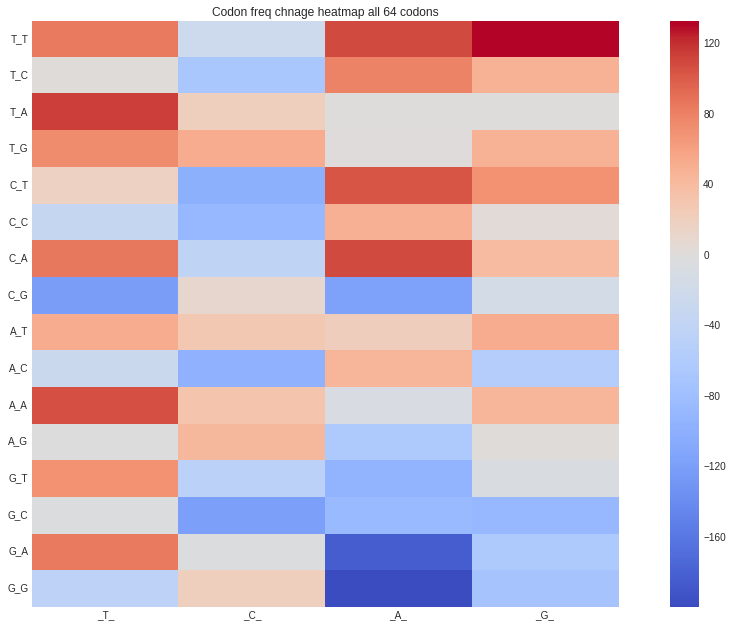

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(codon_meanChangeCount_array), interpolation="nearest", cmap = shiftedColorMap(matplotlib.cm.coolwarm, codon_meanChangeCount_array), aspect =1/4)

# We want to show all ticks...
ax.set_xticks(np.arange(len(base2_axis)))
ax.set_yticks(np.arange(len(base1base3_axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(base2_axis)
ax.set_yticklabels(base1base3_axis)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# for i in range(len(base1base3_axis)):
#     for j in range(len(base2_axis)):
#         text = ax.text(j, i, np.array(codon_meanChangeCount_array)[i, j],
#                        ha="center", va="center", color="k")


ax.grid(False)
ax.set_title("Codon freq chnage heatmap all 64 codons")
#fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.colorbar(im)
#plt.savefig("Plots/CodonChnageHeatmap_2020_08_19_newInvariant.png")
plt.show()

# ** checking that initial exon codon freqs are equal ** 

In [38]:
tmp_exon_codon_counts = {}
for triplet in triplets: 
    tmp_exon_codon_counts[triplet] = []
    
for value in DNA_dataDict.values(): 

    for triplet in triplets: 
        tmp_exon_codon_counts[triplet].append(value[4].count(triplet))
        
for key,value in tmp_exon_codon_counts.items(): 
    tmp_exon_codon_counts[key] = [np.mean(value), math.floor(np.std(value)/np.sqrt(12))]

In [42]:
exon_codon_counts = pd.DataFrame.from_dict(tmp_exon_codon_counts, orient='index')

# ** creating mean chnage df for each a.a. ** 

In [34]:
SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

In [35]:
#count_change_dictionary

In [36]:
import math 

In [44]:
aa_mean_change = {}

for aa, codon_list in SynonymousCodons.items(): 
    aa_current_chnage_list = []
    aa_current_chnage_sd_list = []
    
    initial_freq_list = []
    for codon in codon_list: 
        aa_current_chnage_list.append(np.mean(count_change_dictionary[codon]))
        aa_current_chnage_sd_list.append(np.std(count_change_dictionary[codon])/np.sqrt(12))
        
        initial_freq_list.append(tmp_exon_codon_counts[codon])
        
    aa_mean_change[aa] = [np.mean(initial_freq_list),math.floor(np.mean(aa_current_chnage_list)), np.mean(aa_current_chnage_sd_list)]



In [45]:
aa_mean_change

{'ALA': [145.63749999999999, -38, 6.9755274657291366],
 'ARG': [78.558333333333337, 24, 5.9539275123866595],
 'ASN': [180.55000000000001, 33, 10.576757387977036],
 'ASP': [223.32499999999999, -90, 10.580359576462847],
 'CYS': [104.875, 90, 8.2956779984852744],
 'GLN': [223.30000000000001, -4, 12.402173300394825],
 'GLU': [330.79999999999995, -192, 14.24651210141807],
 'GLY': [145.73750000000001, -58, 8.5172592941685057],
 'HIS': [121.59999999999999, 76, 9.8166272626402318],
 'ILE': [136.53333333333333, 44, 8.9195688838740157],
 'LEU': [144.86666666666665, 22, 8.5423451204568739],
 'LYS': [247.82499999999999, -35, 14.053158527359589],
 'MET': [188.5, -1, 5.7445626465380286],
 'PHE': [154.94999999999999, 43, 9.7950834515628227],
 'PRO': [153.33750000000001, -55, 8.7384346534154815],
 'SER': [155.73333333333332, -4, 12.350890843284249],
 'STOP': [1.4166666666666667, -1, 0.23784712106468633],
 'THR': [174.63749999999999, 2, 15.59284237438616],
 'TRP': [98.5, 47, 6.8328251843582244],
 'TYR'

In [46]:
aa_mean_change = pd.DataFrame.from_dict(aa_mean_change, orient='index')

In [47]:
aa_mean_change.to_csv("aa_mean_change_2020_08_19.csv")

In [369]:
len(DNA_dataDict["Trial1"])

8

# ** TRIPLET CHNAGE ** 

In [48]:
plt.style.use('classic')
plt.style.use('seaborn-white')

In [49]:
len(DNA_dataDict["Trial1"])

6

In [51]:
DNA_dataDict = {}

#DifDNA800kgen trial 1-5
for index_tmp in range(1,int(nTrials)+1):
    file_name_exondict = sim_name_afterSim+str(index_tmp)+"_exon_insertion_dict.txt"
    file_name_dnaI = sim_name_afterSim+str(index_tmp)+"_DNA_gen0_cds.txt"
    file_name_dnaF = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim_finalGen+".txt"
    file_name_dnamap = sim_name_afterSim+str(index_tmp)+"_DNA_map"+about_sim+".txt"
    
    file_object_exondict = json.loads(open(file_path_afterSim+file_name_exondict).readlines()[0])
    file_object_dnaI = open(file_path_afterSim+file_name_dnaI).readlines()[0]
    file_object_dnaF = open(file_path_afterSim+file_name_dnaF).readlines()[0]
    file_object_dnamap = open(file_path_afterSim+file_name_dnamap).readlines()[0]
    
    DNA_dataDict["Trial"+str(index_tmp)] = [file_object_dnaI, file_object_dnaF, file_object_dnamap, file_object_exondict]

#DiferentDNAstring trials 6-10 
# for index_tmp in range(int(nTrials/2)+1, nTrials+1):
#     file_name_exondict = sim_name_afterSim[1]+str(index_tmp)+"_exon_insertion_dict.txt"
#     file_name_dnaI = sim_name_afterSim[1]+str(index_tmp)+"_DNA_gen0_cds.txt"
#     file_name_dnaF = sim_name_afterSim[1]+str(index_tmp)+"_DNA_final"+about_sim+".txt"
#     file_name_dnamap = sim_name_afterSim[1]+str(index_tmp)+"_DNA_map"+about_sim+".txt"

#     file_object_exondict = json.loads(open(file_path_afterSim+file_name_exondict).readlines()[0])
#     file_object_dnaI = open(file_path_afterSim+file_name_dnaI).readlines()[0]
#     file_object_dnaF = open(file_path_afterSim+file_name_dnaF).readlines()[0]
#     file_object_dnamap = open(file_path_afterSim+file_name_dnamap).readlines()[0]
    
#     DNA_dataDict["Trial"+str(index_tmp)] = [file_object_dnaI, file_object_dnaF, file_object_dnamap, file_object_exondict]
    
#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)

    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []

    tmp_nCodons = 0

    for exon_bounds_list in DNA_dataDict[trial_name][3].values():

        i = int(exon_bounds_list[0])+1

        tmp_exon_codons = int((int(exon_bounds_list[1]) - int(exon_bounds_list[0]))/3)
        tmp_nCodons += tmp_exon_codons


        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
    
    DNA_dataDict[trial_name].extend([current_codonsI, current_codonsF])

In [53]:
#adding intronic triplet counts to the dictionary dna_datadict
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)
    
    #turning the exon iseertion dictionary into an ordered list of bounds 
    all_exon_bounds_list = []
    for current_exon_bounds_list in DNA_dataDict[trial_name][3].values():
        all_exon_bounds_list.append(int(current_exon_bounds_list[0]))
        all_exon_bounds_list.append(int(current_exon_bounds_list[1]))    
    all_exon_bounds_list.sort()
    all_exon_bounds_list = [0]+all_exon_bounds_list[0:-1] #dont want the last bound as my dna end in exon 

    current_allIntronTriplets_initial  = []
    current_allIntronTriplets_final  = []

    for start_bound_index in range(0,len(all_exon_bounds_list),2): 
        start_bound = all_exon_bounds_list[start_bound_index]
        end_bound = all_exon_bounds_list[start_bound_index+1]
        for site in range(start_bound+1,end_bound-1): 

            tripletI = DNA_dataDict[trial_name][0][site-1:site+2]
            current_allIntronTriplets_initial.append(tripletI)

            tripletF = DNA_dataDict[trial_name][1][site-1:site+2]
            current_allIntronTriplets_final.append(tripletF)
        
    
    DNA_dataDict[trial_name].extend([current_allIntronTriplets_initial, current_allIntronTriplets_final])

In [54]:
len(DNA_dataDict["Trial1"])

8

In [55]:
#making the counts dictionary 
intron_counts_dict = {}
for triplet in triplets: 
    
    intron_counts_dict[triplet] = []
    
    for trial_number in range(1,nTrials+1):
        trial_name = "Trial"+str(trial_number)
        
        triplet_countI = DNA_dataDict[trial_name][6].count(triplet)
        triplet_countF = DNA_dataDict[trial_name][7].count(triplet)
        
        intron_counts_dict[triplet].append((triplet_countF- triplet_countI)/triplet_countI) 

In [57]:
intron_counts_dict["TTT"]

[0.657516339869281,
 0.8006088280060882,
 0.47474747474747475,
 0.17079889807162535,
 0.8822674418604651,
 0.4226190476190476,
 0.42,
 1.1783088235294117,
 0.5606060606060606,
 0.8072289156626506]

In [58]:
intron_counts_dict["AAA"]

[1.1302083333333333,
 0.4329896907216495,
 0.8053977272727273,
 0.41414141414141414,
 0.7162921348314607,
 0.40486725663716816,
 0.547945205479452,
 0.4840686274509804,
 0.3627232142857143,
 0.5611979166666666]

In [59]:
# MAKING THE MENA AND STD LISTS 
triplet_muts_intron = []
triplet_chnage_mean_intron = []
triplet_chnage_std_intron = []

for triplet in triplets: 
    if triplet in model: 
        triplet_muts_intron.append(model[triplet][0])
    else: 
        triplet_muts_intron.append(model[reverse_complement(triplet)][0])
        
    triplet_chnage_mean_intron.append(np.mean(intron_counts_dict[triplet]))
    triplet_chnage_std_intron.append(np.std(intron_counts_dict[triplet])/np.sqrt(12))

In [60]:
x = 50
print(triplets[x:x+10])
print(triplet_muts_intron[x:x+10])
print(triplet_chnage_mean_intron[x:x+10])
print(triplet_chnage_std_intron[x:x+10])

['GTA', 'GTG', 'GCT', 'GCC', 'GCA', 'GCG', 'GAT', 'GAC', 'GAA', 'GAG']
[0.4143262045864468, 0.3995351785336996, 0.5081906865451868, 0.5527913809990206, 0.49819102749638206, 0.9428571428571428, 0.4466903598400711, 0.38170347003154576, 0.30323054331864907, 0.3202682875707399]
[0.18197865522118506, 0.21110912895267742, -0.1530305591569607, -0.4561404740267635, 0.021842940929053662, -0.56773933279642796, -0.019991351306592325, -0.17996184492339892, 0.038866509150180362, -0.20219574803116261]
[0.047527365677482412, 0.037203358832730259, 0.020797298556605202, 0.020073879769948032, 0.018585591231384965, 0.012816615810767231, 0.033394861954961712, 0.018260553233842437, 0.037868348164783613, 0.028682562726404286]


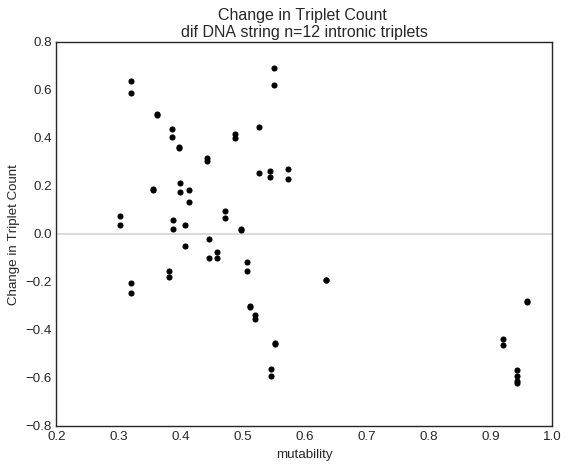

In [61]:
sim_details = "dif DNA string n=12 intronic triplets"

plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(range(1,33), rotation=90)
plt.xlabel("mutability")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count \n"+sim_details)
plt.show()

In [285]:
def adj_mut_calc(dna): 
    """
    string --> float 
    takes a TRIPLET
    calulates the mutability for ALL POSSIBLE triplets (equal weights) adjacent 
    """
    muts_leftadj = []
    muts_rightadj = []
    #piece for triplet -1 relative index 
    piece_leftadj = dna[0:2]
    for base in ["A", "T", "G", "C"]: 
        triplet_leftadj = base+piece_leftadj
        if triplet_leftadj in model: 
            muts_leftadj.append(model[triplet_leftadj][0])
        else: 
            muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])
#     #for triplets -2 relative index         
#     piece_leftadj =  dna[0:1]
#     for base1 in ["A", "T", "G", "C"]: 
#         for base2 in ["A", "T", "G", "C"]: 
#             triplet_leftadj = base1+base2+piece_leftadj
#             if triplet_leftadj in model: 
#                 muts_leftadj.append(model[triplet_leftadj][0])
#             else: 
#                 muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])
#     #for triplets +1 reltive index 
    piece_rightadj = dna[1:3]
    for base in ["A", "T", "G", "C"]: 
        triplet_rightadj = piece_rightadj+base 
        if triplet_rightadj in model: 
            muts_rightadj.append(model[triplet_rightadj][0])
        else: 
            muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
#     #for triplets +2 relative index         
#     piece_rightadj =  dna[2:3]
#     for base1 in ["A", "T", "G", "C"]: 
#         for base2 in ["A", "T", "G", "C"]: 
#             triplet_rightadj =piece_rightadj+base1+base2
#             if triplet_rightadj in model: 
#                 muts_rightadj.append(model[triplet_rightadj][0])
#             else: 
#                 muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])

    return (np.mean(muts_leftadj+muts_rightadj))


In [286]:
adj_mutability = []
for triplet in triplets: 
    adj_mutability.append(adj_mut_calc(triplet))

In [287]:
adj_rangeSize = max(adj_mutability) - min(adj_mutability)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(adj_mutability)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.36550893456261518, 0.46996438078611508, 0.57441982700961502, 0.67887527323311492, 0.78333071945661481]


In [288]:
colour_list_adjMut = []
for value in adj_mutability: 
    if value <= adj_rangeValues[1]: 
        colour_list_adjMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_adjMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_adjMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_adjMut.append("cyan")
    

In [289]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='cyan', label=legendplot[3]+" : "+legendplot[4])

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


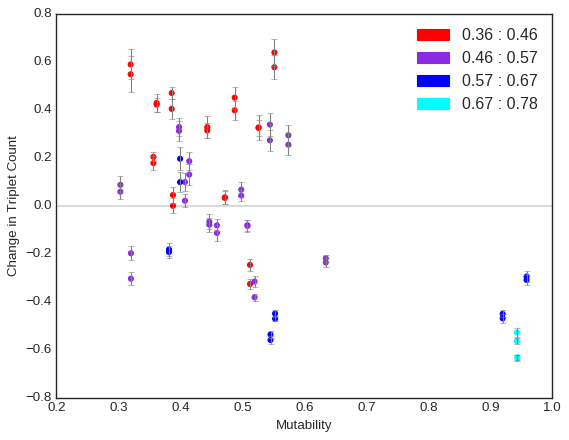

In [429]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in Triplet Count")
#plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n RIGHT adjacent mutability (2 around) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.legend(title = "Adj mut")
plt.savefig("Plots/Triplet_change_2020_08_14_n12_all64intronicTrips_SE_colorAdjMut_only1aroundBothSides_porportional.png")

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


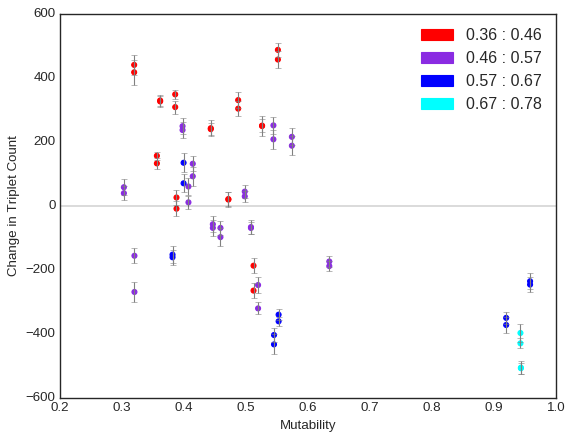

In [368]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in Triplet Count")
#plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n RIGHT adjacent mutability (2 around) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.legend(title = "Adj mut")
plt.savefig("Plots/Triplet_change_2020_08_10_n12_all64intronicTrips_SE_colorAdjMut_only1aroundBothSides.png")

In [413]:
#help(plt.legend)

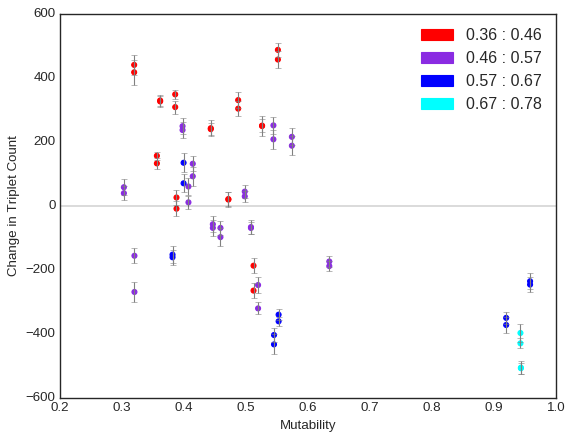

In [364]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in Triplet Count")
#plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n RIGHT adjacent mutability (2 around) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.savefig("Plots/Triplet_change_2020_08_10_n12_all64intronicTrips_SE_colorAdjMut_only1aroundBothSides.png")

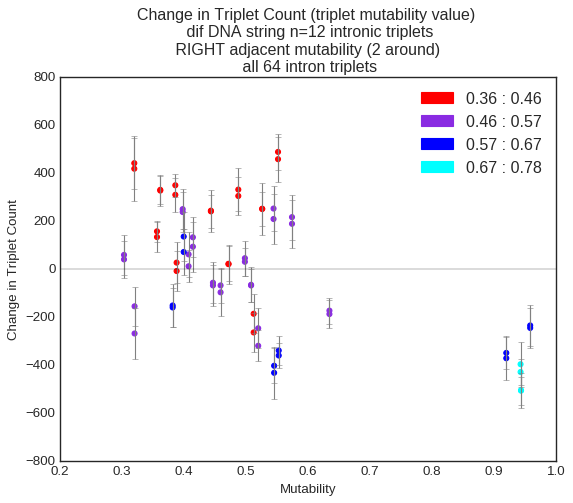

In [304]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n RIGHT adjacent mutability (2 around) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.savefig("Plots/Triplet_change_2020_08_10.png")

# ** most extreme left/right hand value (compared to centre base mutability value) ** 

In [42]:
def adj_mut_calc_mostExtreme(dna,model): 
    """
    string --> float 
    takes a TRIPLET
    calulates the mutability for ALL POSSIBLE triplets (equal weights) adjacent 
    """
    muts_leftadj = []
    muts_rightadj = []
    #piece for triplet -1 relative index 
    piece_leftadj = dna[0:2]
    for base in ["A", "T", "G", "C"]: 
        triplet_leftadj = base+piece_leftadj
        if triplet_leftadj in model: 
            muts_leftadj.append(model[triplet_leftadj][0])
        else: 
            muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])

    #for triplets +1 reltive index 
    piece_rightadj = dna[1:3]
    for base in ["A", "T", "G", "C"]: 
        triplet_rightadj = piece_rightadj+base 
        if triplet_rightadj in model: 
            muts_rightadj.append(model[triplet_rightadj][0])
        else: 
            muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
            
    avmut_leftadj = np.mean(muts_leftadj)
    avmut_rightadj = np.mean(muts_rightadj)
    
    if dna in model: 
        triplet_for_model = dna
    else: 
        triplet_for_model = reverse_complement(dna)
    
    if abs(avmut_leftadj-model[triplet_for_model][0])>= abs(avmut_rightadj-model[triplet_for_model][0]): 
        return avmut_leftadj
    else: 
        return avmut_rightadj


In [43]:
adj_mutability = []
for triplet in triplets: 
    adj_mutability.append(adj_mut_calc_mostExtreme(triplet,model))

In [44]:
adj_rangeSize = max(adj_mutability) - min(adj_mutability)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(adj_mutability)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.34270254081285589, 0.42394662642714626, 0.50519071204143662, 0.58643479765572692, 0.66767888327001734]


In [45]:
colour_list_adjMut = []
for value in adj_mutability: 
    if value <= adj_rangeValues[1]: 
        colour_list_adjMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_adjMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_adjMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_adjMut.append("cyan")
    

In [46]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='cyan', label=legendplot[3]+" : "+legendplot[4])

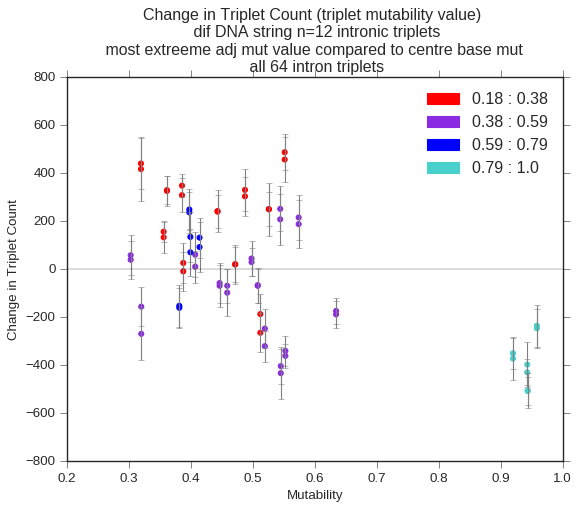

In [110]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n most extreeme adj mut value compared to centre base mut \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

# ** NOW LETS DO MOST EXREME value as compared to vaerage human triplet mutability** 

** first lets try using unscaled average of all triple tmutabilties) ** 

In [48]:
averageTripMut_unscaled = []
for value in model.values():
    averageTripMut_unscaled.append(value[0])
print(averageTripMut_unscaled)
averageTripMut_unscaled = np.mean(averageTripMut_unscaled)
print(averageTripMut_unscaled)

[0.48758198043221157, 0.9197916666666667, 0.5453669813138123, 0.3995351785336996, 0.3978541712283775, 0.38808618504435993, 0.44338655339094774, 0.5081906865451868, 0.9428571428571428, 0.5123493090267568, 0.3995351785336996, 0.4466903598400711, 0.30323054331864907, 0.49819102749638206, 0.5741935483870968, 0.5196784458214705, 0.38170347003154576, 0.3978541712283775, 0.9583888149134487, 0.3202682875707399, 0.49819102749638206, 0.5527913809990206, 0.3202682875707399, 0.3198252625708709, 0.544423228125351, 0.9428571428571428, 0.5527913809990206, 0.3860215053763441, 0.4073735527117611, 0.943577893317928, 0.36173285198555954, 0.943577893317928, 0.5741935483870968, 0.5516478655164787, 0.35645079041305455, 0.30323054331864907, 0.4717741935483871, 0.38808618504435993, 0.3860215053763441, 0.48758198043221157, 0.6345660930062248, 0.4466903598400711, 0.36173285198555954, 0.4589957500393515, 0.5261127596439169, 0.3198252625708709, 0.5516478655164787, 0.4589957500393515, 0.544423228125351, 0.38170347

In [49]:
averageTripMut_unscaled = []
for value in model.values():
    averageTripMut_unscaled.append(value[0])
print(averageTripMut_unscaled)
averageTripMut_unscaled = np.mean(averageTripMut_unscaled)
print(averageTripMut_unscaled)

[0.48758198043221157, 0.9197916666666667, 0.5453669813138123, 0.3995351785336996, 0.3978541712283775, 0.38808618504435993, 0.44338655339094774, 0.5081906865451868, 0.9428571428571428, 0.5123493090267568, 0.3995351785336996, 0.4466903598400711, 0.30323054331864907, 0.49819102749638206, 0.5741935483870968, 0.5196784458214705, 0.38170347003154576, 0.3978541712283775, 0.9583888149134487, 0.3202682875707399, 0.49819102749638206, 0.5527913809990206, 0.3202682875707399, 0.3198252625708709, 0.544423228125351, 0.9428571428571428, 0.5527913809990206, 0.3860215053763441, 0.4073735527117611, 0.943577893317928, 0.36173285198555954, 0.943577893317928, 0.5741935483870968, 0.5516478655164787, 0.35645079041305455, 0.30323054331864907, 0.4717741935483871, 0.38808618504435993, 0.3860215053763441, 0.48758198043221157, 0.6345660930062248, 0.4466903598400711, 0.36173285198555954, 0.4589957500393515, 0.5261127596439169, 0.3198252625708709, 0.5516478655164787, 0.4589957500393515, 0.544423228125351, 0.38170347

In [50]:
def adj_mut_calc_mostExtreme(dna,averageTripMut_unscaled): 
    """
    string --> float 
    takes a TRIPLET
    calulates the mutability for ALL POSSIBLE triplets (equal weights) adjacent 
    """
    muts_leftadj = []
    muts_rightadj = []
    #piece for triplet -1 relative index 
    piece_leftadj = dna[0:2]
    for base in ["A", "T", "G", "C"]: 
        triplet_leftadj = base+piece_leftadj
        if triplet_leftadj in model: 
            muts_leftadj.append(model[triplet_leftadj][0])
        else: 
            muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])

    #for triplets +1 reltive index 
    piece_rightadj = dna[1:3]
    for base in ["A", "T", "G", "C"]: 
        triplet_rightadj = piece_rightadj+base 
        if triplet_rightadj in model: 
            muts_rightadj.append(model[triplet_rightadj][0])
        else: 
            muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
            
    avmut_leftadj = np.mean(muts_leftadj)
    avmut_rightadj = np.mean(muts_rightadj)
    
#     if dna in model: 
#         triplet_for_model = dna
#     else: 
#         triplet_for_model = reverse_complement(dna)

    #here is "average value" to compare for most extreme case 
    
    if abs(avmut_leftadj-averageTripMut_unscaled)>= abs(avmut_rightadj-averageTripMut_unscaled): 
        return avmut_leftadj
    else: 
        return avmut_rightadj


In [51]:
adj_mutability = []
for triplet in triplets: 
    adj_mutability.append(adj_mut_calc_mostExtreme(triplet,averageTripMut_unscaled))

In [52]:
adj_rangeSize = max(adj_mutability) - min(adj_mutability)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(adj_mutability)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.34270254081285589, 0.49231537546934107, 0.64192821012582624, 0.79154104478231146, 0.94115387943879658]


In [53]:
colour_list_adjMut = []
for value in adj_mutability: 
    if value <= adj_rangeValues[1]: 
        colour_list_adjMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_adjMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_adjMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_adjMut.append("mediumturquoise")
    

In [54]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

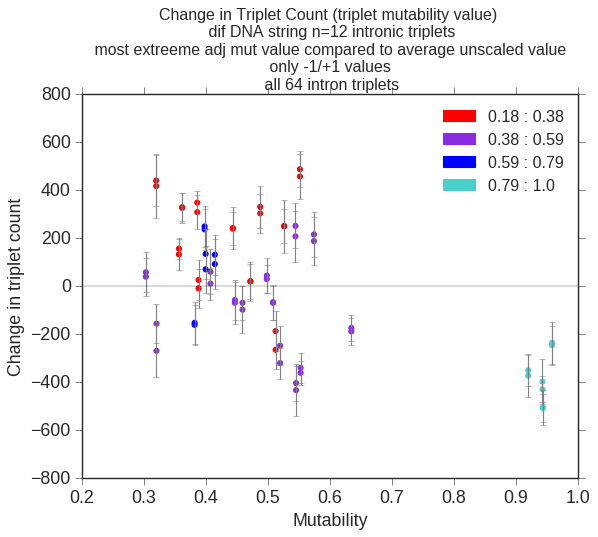

In [109]:
plt.style.use("classic")
plt.style.use("seaborn-ticks")
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability", size = 16)
plt.ylabel("Change in triplet count", size = 16)
plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n most extreeme adj mut value compared to average unscaled value \n only -1/+1 values \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

plt.xticks(size=16)
plt.yticks(size=16)

plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

# ** most extreme, using +1+2/-1-2 both direclty influenced surroundid indices** 

In [56]:
def adj_mut_calc_mostExtreme_all2(dna,averageTripMut_unscaled): 
    """
    string --> float 
    takes a TRIPLET
    calulates the mutability for ALL POSSIBLE triplets (equal weights) adjacent 
    """
    muts_leftadj = []
    muts_rightadj = []
    #piece for triplet -1 relative index 
    piece_leftadj = dna[0:2]
    for base in ["A", "T", "G", "C"]: 
        triplet_leftadj = base+piece_leftadj
        if triplet_leftadj in model: 
            muts_leftadj.append(model[triplet_leftadj][0])
        else: 
            muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])
            
    #for triplets -2 relative index         
    piece_leftadj =  dna[0:1]
    for base1 in ["A", "T", "G", "C"]: 
        for base2 in ["A", "T", "G", "C"]: 
            triplet_leftadj = base1+base2+piece_leftadj
            if triplet_leftadj in model: 
                 muts_leftadj.append(model[triplet_leftadj][0])
            else: 
                 muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])


    #for triplets +1 reltive index 
    piece_rightadj = dna[1:3]
    for base in ["A", "T", "G", "C"]: 
        triplet_rightadj = piece_rightadj+base 
        if triplet_rightadj in model: 
            muts_rightadj.append(model[triplet_rightadj][0])
        else: 
            muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
            
    #for triplets +2 relative index         
    piece_rightadj =  dna[2:3]
    for base1 in ["A", "T", "G", "C"]: 
        for base2 in ["A", "T", "G", "C"]: 
            triplet_rightadj =piece_rightadj+base1+base2
            if triplet_rightadj in model: 
                muts_rightadj.append(model[triplet_rightadj][0])
            else: 
                muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
            
    avmut_leftadj = np.mean(muts_leftadj)
    avmut_rightadj = np.mean(muts_rightadj)
    
#     if dna in model: 
#         triplet_for_model = dna
#     else: 
#         triplet_for_model = reverse_complement(dna)

    #here is "average value" to compare for most extreme case 
    
    if abs(avmut_leftadj-averageTripMut_unscaled)>= abs(avmut_rightadj-averageTripMut_unscaled): 
        return avmut_leftadj
    else: 
        return avmut_rightadj


In [57]:
adj_mutability = []
for triplet in triplets: 
    adj_mutability.append(adj_mut_calc_mostExtreme_all2(triplet,averageTripMut_unscaled))

In [58]:
adj_rangeSize = max(adj_mutability) - min(adj_mutability)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(adj_mutability)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.43906647527529896, 0.48068279310511342, 0.52229911093492776, 0.56391542876474221, 0.60553174659455666]


In [59]:
colour_list_adjMut = []
for value in adj_mutability: 
    if value <= adj_rangeValues[1]: 
        colour_list_adjMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_adjMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_adjMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_adjMut.append("mediumturquoise")
    

In [60]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

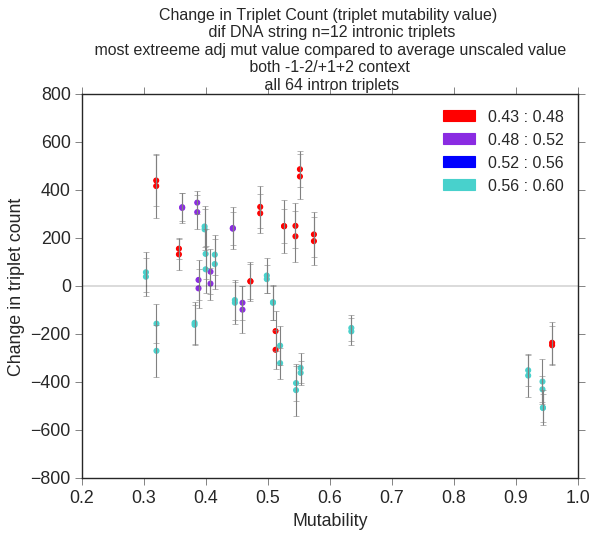

In [64]:
plt.style.use("classic")
plt.style.use("seaborn-ticks")
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability", size = 16)
plt.ylabel("Change in triplet count", size = 16)
plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n most extreeme adj mut value compared to average unscaled value \n both -1-2/+1+2 context \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

plt.xticks(size=16)
plt.yticks(size=16)

plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

# ** central aevrage valu e= MEDIAN not mean ** 

In [475]:
#triplet_muts_intron

In [65]:
triplet_muts_intron_sorted = copy.copy(triplet_muts_intron)
triplet_muts_intron_sorted.sort()

In [66]:
medianTripMut = triplet_muts_intron_sorted[int(len(triplet_muts_intron_sorted)/2)-1]

In [67]:
medianTripMut

0.4717741935483871

In [68]:
triplet_muts_intron_sorted[31]

0.4717741935483871

In [69]:
adj_mutability = []
for triplet in triplets: 
    adj_mutability.append(adj_mut_calc_mostExtreme(triplet,medianTripMut))

In [70]:
adj_rangeSize = max(adj_mutability) - min(adj_mutability)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(adj_mutability)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.34270254081285589, 0.49231537546934107, 0.64192821012582624, 0.79154104478231146, 0.94115387943879658]


In [71]:
colour_list_adjMut = []
for value in adj_mutability: 
    if value <= adj_rangeValues[1]: 
        colour_list_adjMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_adjMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_adjMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_adjMut.append("mediumturquoise")
    

In [72]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

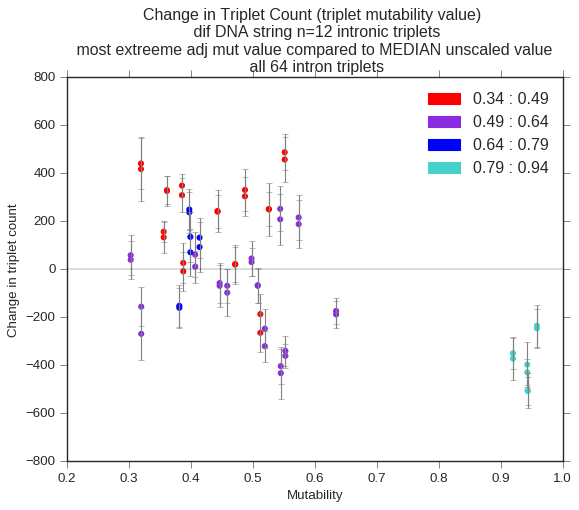

In [73]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_adjMut, edgecolors = colour_list_adjMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in triplet count")
plt.title("Change in Triplet Count (triplet mutability value) \n " + sim_details+"\n most extreeme adj mut value compared to MEDIAN unscaled value \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

# ** color triplets by potential mutate into possibilities ** 

** lets do "mutability of the triplets it TURNS INTO"  ** 

In [75]:
triplets_turnIntoTripletMut = []
for triplet in triplets: 

    current_weight_mut =[]

    for middle_base in bases: 

        to_triplet = triplet[0]+middle_base+triplet[2]

        if to_triplet != triplet: 

            current_mut = full_model[to_triplet][0]
            current_prob = full_model[triplet][1][to_triplet]
            current_weight_mut.append(current_prob*current_mut)
            #print(to_triplet, str(current_mut), str(current_prob), current_weight_mut, sep = "\t")
        
    triplets_turnIntoTripletMut.append(np.mean(current_weight_mut))
        

In [76]:
adj_rangeSize = max(triplets_turnIntoTripletMut) - min(triplets_turnIntoTripletMut)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(triplets_turnIntoTripletMut)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.12212214694685673, 0.16360577026536871, 0.20508939358388067, 0.24657301690239267, 0.28805664022090466]


In [77]:
colour_list_nextMut = []
for value in triplets_turnIntoTripletMut: 
    if value <= adj_rangeValues[1]: 
        colour_list_nextMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_nextMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_nextMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_nextMut.append("mediumturquoise")
    

In [78]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

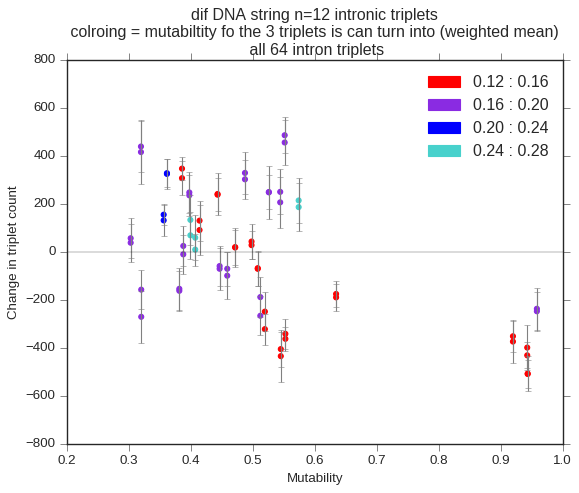

In [79]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_nextMut, edgecolors = colour_list_nextMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in triplet count")
plt.title( sim_details+"\n colroing = mutabiltity fo the 3 triplets is can turn into (weighted mean) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

** noe lets do "mutability of the triplet it runs FROM ** 

In [80]:
triplets_turnFromTripletMut = []
for triplet in triplets: 

    current_weight_mut =[]

    for middle_base in bases: 

        from_triplet = triplet[0]+middle_base+triplet[2]

        if from_triplet != triplet: 

            current_mut = full_model[from_triplet][0]
            current_prob = full_model[from_triplet][1][triplet]
            
            current_weight_mut.append(current_mut*current_prob)
            
    triplets_turnFromTripletMut.append(np.mean(current_weight_mut))
        

In [81]:
adj_rangeSize = max(triplets_turnFromTripletMut) - min(triplets_turnFromTripletMut)
adj_nbin = 4
adj_windowSize = adj_rangeSize/adj_nbin
adj_rangeValues = [min(triplets_turnFromTripletMut)+i*adj_windowSize for i in range(0,adj_nbin+1)]
print(adj_rangeValues)

[0.094809833065952323, 0.1538377141154525, 0.21286559516495263, 0.27189347621445281, 0.33092135726395294]


In [82]:
colour_list_nextMut = []
for value in triplets_turnFromTripletMut: 
    if value <= adj_rangeValues[1]: 
        colour_list_nextMut.append("red")
    elif value <= adj_rangeValues[2]: 
            colour_list_nextMut.append("blueviolet")
    elif value <= adj_rangeValues[3]: 
        colour_list_nextMut.append("blue")
    elif value >= adj_rangeValues[3]: 
        colour_list_nextMut.append("mediumturquoise")
    

In [83]:
legendplot = [str(i)[0:4] for i in adj_rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

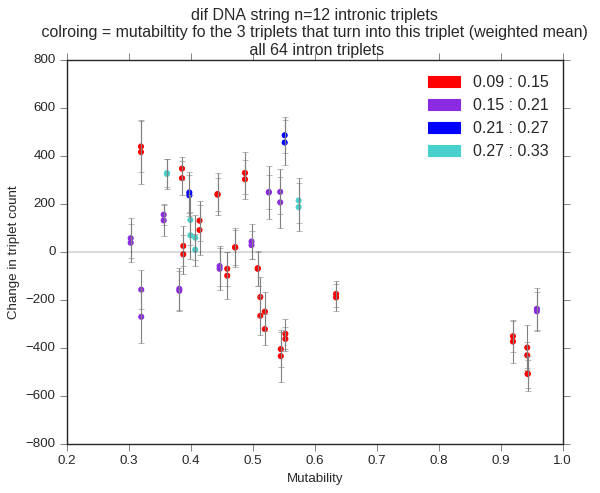

In [84]:
plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron, c = colour_list_nextMut, edgecolors = colour_list_nextMut)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in triplet count")
plt.title( sim_details+"\n colroing = mutabiltity fo the 3 triplets that turn into this triplet (weighted mean) \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

# ** checking that intron triplet freqs are equal ** 

In [500]:
tmp_intron_triplet_counts = {}
for triplet in triplets: 
    tmp_intron_triplet_counts[triplet] = []
    
for value in DNA_dataDict.values(): 

    for triplet in triplets: 
        tmp_intron_triplet_counts[triplet].append(value[6].count(triplet))

In [525]:
#tmp_intron_triplet_counts

In [527]:
list_av_triplet_intron_counts = []
for key, value in tmp_intron_triplet_counts.items(): 
    #print(key, np.mean(value), sep = "\t")
    list_av_triplet_intron_counts.append(np.mean(value))

In [528]:
print(list_av_triplet_intron_counts)

[762.60000000000002, 773.79999999999995, 814.10000000000002, 814.10000000000002, 757.5, 809.70000000000005, 799.0, 820.5, 755.5, 793.10000000000002, 779.20000000000005, 808.0, 783.29999999999995, 778.10000000000002, 811.39999999999998, 775.5, 781.89999999999998, 735.60000000000002, 790.0, 757.0, 780.10000000000002, 784.10000000000002, 759.89999999999998, 792.70000000000005, 766.60000000000002, 794.5, 796.79999999999995, 775.29999999999995, 794.39999999999998, 798.89999999999998, 747.10000000000002, 718.29999999999995, 799.20000000000005, 796.10000000000002, 774.5, 740.79999999999995, 746.20000000000005, 774.89999999999998, 804.89999999999998, 777.39999999999998, 797.0, 771.60000000000002, 759.39999999999998, 772.29999999999995, 714.29999999999995, 812.79999999999995, 778.0, 789.79999999999995, 794.10000000000002, 787.5, 780.10000000000002, 787.5, 780.89999999999998, 810.29999999999995, 813.10000000000002, 778.29999999999995, 785.5, 766.20000000000005, 775.60000000000002, 825.7999999999

In [532]:
print(min(list_av_triplet_intron_counts))
print(max(list_av_triplet_intron_counts))
print(np.mean(list_av_triplet_intron_counts))
print(list_av_triplet_intron_counts[31]) # median 
print(np.std(list_av_triplet_intron_counts))

714.3
825.8
780.9203125
718.3
23.5657204675


** largest difference is 718 vs 825 ** 
- note enough to make a difference in the graph (scale in 1000s) 

# ** plotting the bottom left peice of graph ** 
- trying to udnerstand if the outliers are a result of the "not being turned into often enough" 

In [541]:
triplet_muts_intro_bli = []
triplet_chnage_mean_intron_bli = []
colour_list_nextMut_bli = []
adj_mutability_bli = []
triplets_turnFromTripletMut_bli = []

for index in range(0,len(triplet_chnage_mean_intron)): 
    if triplet_chnage_mean_intron[index] <= 0 : 
        if triplet_muts_intron[index] <= 0.7: 
            print(triplets[index], triplet_chnage_mean_intron[index], triplet_muts_intron[index], colour_list_adjMut[index], colour_list_nextMut[index], sep = "\t" )
            adj_mutability_bli.append(adj_mutability[index])
            triplets_turnFromTripletMut_bli.append(triplets_turnFromTripletMut[index])


TCC	-555.3	0.5196784458214705	red	red
TCA	-659.7	0.44338655339094774	red	red
TAC	-650.5	0.4143262045864468	blue	red
TAA	-615.7	0.3860215053763441	red	red
TAG	-100.2	0.38808618504435993	red	red
TGC	-186.6	0.49819102749638206	blueviolet	blueviolet
CTC	-503.3	0.3202682875707399	blueviolet	blueviolet
CTA	-627.9	0.38808618504435993	red	red
CCT	-584.2	0.5123493090267568	red	red
CCC	-798.3	0.5453669813138123	blueviolet	red
CCA	-737.4	0.4589957500393515	red	red
CAT	-697.5	0.5741935483870968	red	mediumturquoise
CAC	-720.1	0.3995351785336996	blue	mediumturquoise
CAA	-757.0	0.36173285198555954	red	mediumturquoise
CAG	-716.6	0.4073735527117611	red	mediumturquoise
ATC	-600.7	0.4466903598400711	blueviolet	blueviolet
ATA	-651.1	0.544423228125351	red	blueviolet
ATG	-150.2	0.5741935483870968	red	mediumturquoise
ACT	-585.5	0.5261127596439169	red	blueviolet
ACC	-773.8	0.6345660930062248	red	red
ACA	-741.2	0.5516478655164787	red	blue
AAT	-605.2	0.48758198043221157	red	red
AAC	-782.5	0.3978541712283775	red

In [545]:
from numpy import cov

In [546]:
cov(adj_mutability_bli, triplets_turnFromTripletMut_bli)

array([[ 0.0149329 ,  0.00128992],
       [ 0.00128992,  0.00463522]])

In [547]:
from scipy.stats import pearsonr

In [549]:
pearsonr(adj_mutability_bli, triplets_turnFromTripletMut_bli)

(0.15504409043614009, 0.35264752366993657)

In [551]:
corr, _ =pearsonr(adj_mutability_bli, triplets_turnFromTripletMut_bli)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.155


# ** make the heatmap for each triplet SUMMARIZING all the crap above ** 

In [585]:
len(triplets)

64

In [ ]:
triplet_muts_intron,

triplet_chnage_mean_intron

colour_list_nextMut
triplets_turnFromTripletMut

colour_list_adjMut
adj_mutability

In [596]:
triplet_summary_heatmap = {"Mut":triplet_muts_intron, "Change":triplet_chnage_mean_intron, "Adj_mut": adj_mutability, "From_weights":triplets_turnFromTripletMut}

In [590]:
#triplet_summary_heatmap 

In [599]:
triplet_summary_heatmap_df = pd.DataFrame(triplet_summary_heatmap, index = triplets) 

In [716]:
triplet_summary_heatmap_df

,Adj_mut,Change,From_weights,Mut
TTT,0.342703,5953.7,0.127486,0.319825
TTC,0.390428,389.8,0.165189,0.303231
TTA,0.390428,172.5,0.140264,0.386022
TTG,0.390428,3430.0,0.315875,0.361733
TCT,0.362973,730.3,0.102487,0.471774
TCC,0.362973,-555.3,0.099807,0.519678
TCA,0.362973,-659.7,0.136205,0.443387
TCG,0.941154,-298.1,0.122728,0.919792
TAT,0.433214,48.2,0.167359,0.544423
TAC,0.667679,-650.5,0.149521,0.414326


In [640]:
triplet_summary_heatmap_df_bl = triplet_summary_heatmap_df[(triplet_summary_heatmap_df.Change <0) & (triplet_summary_heatmap_df.Mut <0.7)]

In [640]:
triplet_summary_heatmap_df_bl[(triplet_summary_heatmap_df_bl.Adj_mut <0.5) & (triplet_summary_heatmap_df_bl.Mut <0.7)]

In [603]:
data = []
for index, triplet in enumerate(triplets): 
    data.append([triplet_muts_intron[index], triplet_chnage_mean_intron[index], triplets_turnFromTripletMut[index], adj_mutability[index]])

In [606]:
data = np.random.random(size=(10,15))
type(data)

numpy.ndarray

In [607]:
data = []
for index, triplet in enumerate(triplets): 
    data.append([triplet_muts_intron[index], triplet_chnage_mean_intron[index], triplets_turnFromTripletMut[index], adj_mutability[index]])
data = np.array(data)
type(data)

numpy.ndarray

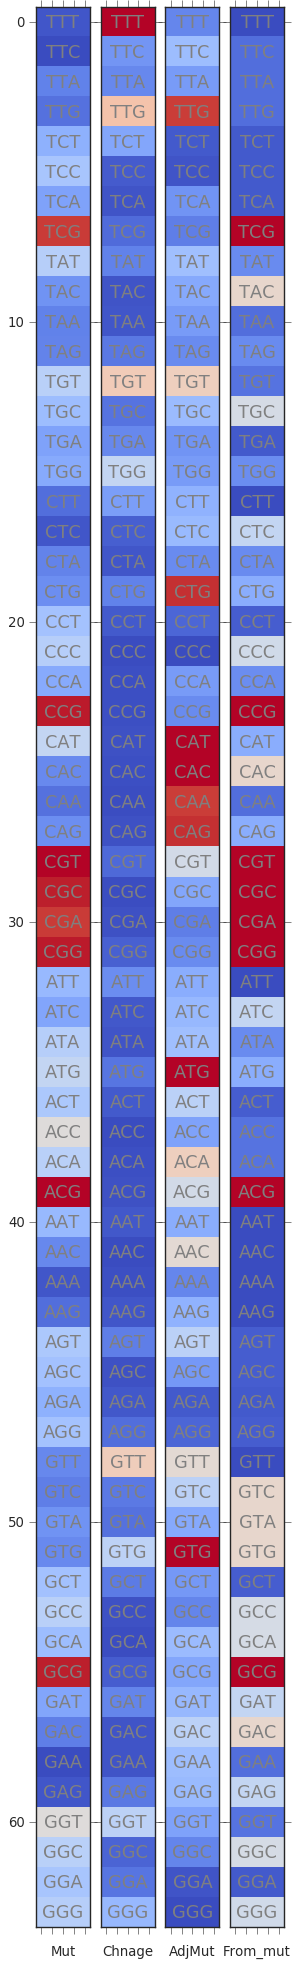

In [698]:


fig, axs = plt.subplots(1,4,sharey=True, figsize=(4,30))

fig.figsize = [10.4, 4.8]


a1 = axs[0].imshow(data[:,:1], cmap="coolwarm", 
                  
               interpolation='nearest')
#plt.colorbar(a1)
a2 = axs[1].imshow(data[:,1:2], cmap="coolwarm", 
                  
               interpolation='nearest')
#plt.colorbar(a2)
a3 = axs[2].imshow(data[:,2:3], cmap="coolwarm", 
                  
               interpolation='nearest')
#plt.colorbar(a3)
a4 = axs[3].imshow(data[:,3:], cmap="coolwarm", 
                  
               interpolation='nearest')
#plt.colorbar(a4)

for ax,l in zip(axs,['Mut','Chnage','AdjMut', "From_mut"]):
    ax.set_aspect(aspect="auto")
    ax.set_xticklabels([])
    ax.set_xlabel(l)
    
    for i in range(len(triplets)):
        text = ax.text(0, i, triplets[i],
                       ha="center", va="center", color="grey", size = 16)



plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")



plt.show()

# ** DOING THE MULTIPEL REGRESSION ** 
1. mutability
2. adj mutability (-1+1 both) 
3. from triplet  weighted 
4. to triplet mut weighted
5. codon usage? 

In [ ]:
# here are the variables
triplet_muts_intron
regression_adj_mutability
triplets_turnFromTripletMut
triplets_turnIntoTripletMut
codon_chnage
#output  
triplet_chnage_mean_intron


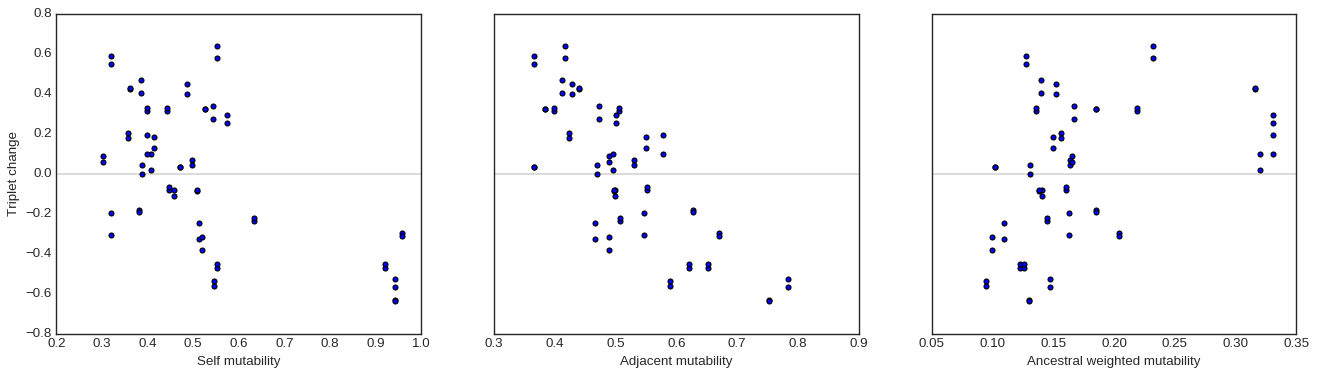

In [433]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(20,5))

#fig.figsize = [5, 20]

ax1.scatter(triplet_muts_intron, triplet_chnage_mean_intron)
#ax1.set_title( "Self mutability on triplet chnage")
ax1.set_ylabel('Triplet change')
ax1.set_xlabel("Self mutability")
ax1.axhline(y = 0, linewidth = 0.25, color = "k")

ax2.scatter(regression_adj_mutability, triplet_chnage_mean_intron)
#ax2.set_title( "Adj mutability on triplet chnage \n (+1/-1 only, left AND right averaged)")
ax2.set_xlabel("Adjacent mutability")
ax2.axhline(y = 0, linewidth = 0.25, color = "k")

ax3.scatter(triplets_turnFromTripletMut, triplet_chnage_mean_intron)
#ax3.set_title( "Weighted mutability of triplets \n that this tripelt turns from ")
ax3.set_xlabel("Ancestral weighted mutability")
ax3.axhline(y = 0, linewidth = 0.25, color = "k")
# ax4.scatter(triplets_turnIntoTripletMut, triplet_chnage_mean_intron)
# ax4.set_title("Weighted mutability of triplets \n that this triplet turns into")
# ax1.set_xlabel("Self mutability")
#a5 = axs[4].scatter(triplet_muts_intron, triplet_chnage_mean_intron)

plt.savefig("Plots/regresion_tripelt_chnage_summary_2020_08_14.png")


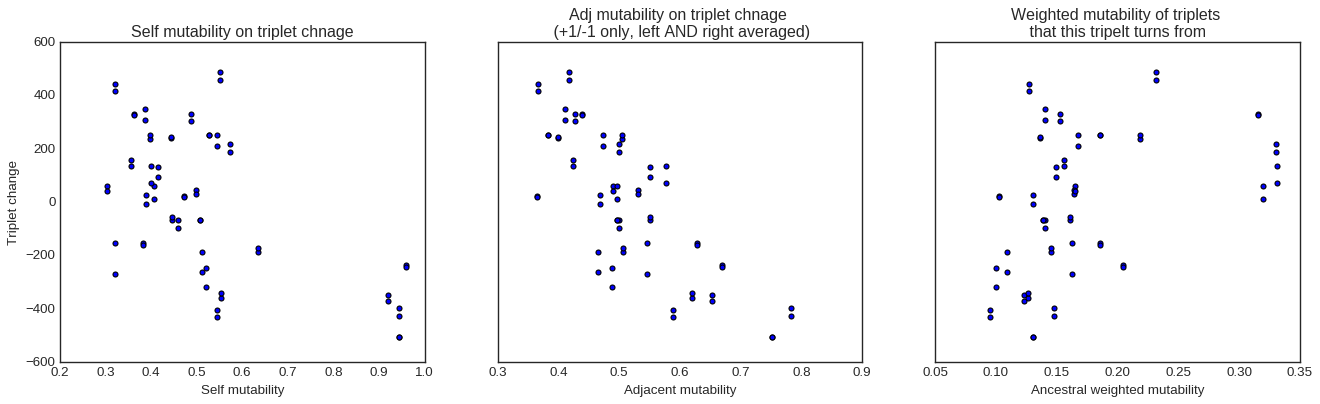

In [422]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(20,5))

#fig.figsize = [5, 20]

ax1.scatter(triplet_muts_intron, triplet_chnage_mean_intron)
ax1.set_title( "Self mutability on triplet chnage")
ax1.set_ylabel('Triplet change')
ax1.set_xlabel("Self mutability")
ax2.scatter(regression_adj_mutability, triplet_chnage_mean_intron)
ax2.set_title( "Adj mutability on triplet chnage \n (+1/-1 only, left AND right averaged)")
ax2.set_xlabel("Adjacent mutability")
ax3.scatter(triplets_turnFromTripletMut, triplet_chnage_mean_intron)
ax3.set_title( "Weighted mutability of triplets \n that this tripelt turns from ")
ax3.set_xlabel("Ancestral weighted mutability")
# ax4.scatter(triplets_turnIntoTripletMut, triplet_chnage_mean_intron)
# ax4.set_title("Weighted mutability of triplets \n that this triplet turns into")
# ax1.set_xlabel("Self mutability")
#a5 = axs[4].scatter(triplet_muts_intron, triplet_chnage_mean_intron)

plt.show()


## ** i guess the linearity assumption is kinda true.... ** 

In [204]:
!pip3.5 install sklearn --user 

    100% |████████████████████████████████| 7.0MB 176kB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 4.4MB/s eta 0:00:01
  Running setup.py install for sklearn ... done


**  lets start with single regression  on the best predicotr so far ** 

In [206]:
import pandas as pd
from sklearn import linear_model

In [235]:
x_adj = np.array(regression_adj_mutability).reshape((-1, 1))
x_mut = np.array(triplet_muts_intron).reshape((-1, 1))
y = np.array(triplet_chnage_mean_intron)


In [228]:
model = linear_model.LinearRegression().fit(x_adj, y)
model.score(x, y)

0.6041650832621005

** multiple regression now ** 

In [252]:
def normalize_list(list_tmp):
    """
    takes in a numeric list, outputs the normalized list 
    """
    normalized_list = []
    for element in list_tmp: 
        normalized_list.append(element/max(list_tmp))
        
    return(normalized_list)
        

In [253]:
normalize_list([1,2,3,4])

[0.25, 0.5, 0.75, 1.0]

In [254]:
triplet_muts_intron_norm = normalize_list(triplet_muts_intron)
regression_adj_mutability_norm = normalize_list(regression_adj_mutability)
triplets_turnFromTripletMut_norm = normalize_list(triplets_turnFromTripletMut)
triplets_turnIntoTripletMut_norm = normalize_list(triplets_turnIntoTripletMut)

In [404]:
regression_multiplearray = []
for (a, b, c) in zip(triplet_muts_intron_norm,regression_adj_mutability_norm, triplets_turnFromTripletMut_norm): 
     regression_multiplearray.append([a,b,c])
        
regression_multiplearray = np.array(regression_multiplearray)

In [405]:
model_3 = linear_model.LinearRegression().fit(regression_multiplearray, y)
r_squared = model_3.score(regression_multiplearray, y)
print(r_squared)

0.752182550797


In [434]:
model_3 = linear_model.LinearRegression().fit(regression_multiplearray,  np.array(triplet_chnage_mean_intron))
r_squared = model_3.score(regression_multiplearray, y)
print(r_squared)

0.00194942865735


In [256]:
model_3 = linear_model.LinearRegression().fit(regression_multiplearray, y)
r_squared = model_3.score(regression_multiplearray, y)
print(r_squared)

0.803084771397


In [406]:
adjusted_r_squared = 1-((1-r_squared)*(N-1)/(N-p-1))
print(adjusted_r_squared)

0.7353813678


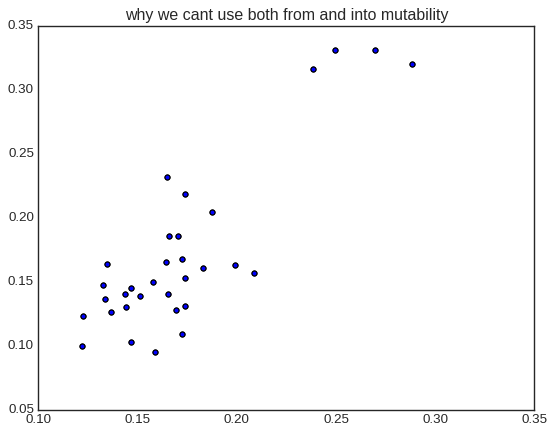

In [407]:
plt.scatter(triplets_turnIntoTripletMut,triplets_turnFromTripletMut )
plt.title("why we cant use both from and into mutability")

In [258]:
model_3.coef_

array([ -120.68666493, -1533.08583763,  1014.94270026,  -879.50335465])

In [263]:
#help(linear_model.LinearRegression())

In [414]:
print(bases)

['T', 'C', 'A', 'G']


In [219]:
regression_dict = {'Mut': triplet_muts_intron,
                'Adj_mut': regression_adj_mutability,
                'From_mut': triplets_turnFromTripletMut,
                'To_mut': triplets_turnIntoTripletMut, 
                "triplet_chnage": triplet_chnage_mean_intron,
                }

regression_df = pd.DataFrame(regression_dict,columns=["Mut", "Adj_mut", "From_mut", "To_mut", "triplet_chnage"], index = triplets)


In [221]:
regression_df.head()

,Mut,Adj_mut,From_mut,To_mut,triplet_chnage
TTT,0.319825,0.366565,0.127486,0.169499,440.916667
TTC,0.303231,0.489543,0.165189,0.164520,58.666667
TTA,0.386022,0.411821,0.140264,0.143458,348.833333
TTG,0.361733,0.439242,0.315875,0.238334,329.833333
TCT,0.471774,0.365509,0.102487,0.146668,21.750000


In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

In [223]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(regression_df[["Adj_mut"]], regression_df[["triplet_chnage"]])

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# ** APPENDIX** 

In [ ]:
counts_initial = {}
counts_final = {}

for triplet in model.keys(): 
    print(triplet)
    for index in range(1,nTrials+1): 
        trial_name = "Trial"+index
        print(trial_name)
        DNAI_thisTrial = DNA_dataDict[trial_name][0]
        DNAF_thisTrial = DNA_dataDict[trial_name][1]
        DNAmap_thisTrial = DNA_dataDict[trial_name][2]
        
        
        

In [60]:
DNA_dataDict.keys()

dict_keys(['Trial4', 'Trial5', 'Trial9', 'Trial7', 'Trial6', 'Trial3', 'Trial1', 'Trial2', 'Trial8', 'Trial10'])

In [81]:
print(DNA_dataDict["Trial1"][0][0:10])
print(DNA_dataDict["Trial1"][1][0:10])
print(DNA_dataDict["Trial1"][2])

AGCCTGGGGA
AGCTTTTGAG
{'ENST00000360351.8': [79883, 85367], 'ENST00000359988.4': [91617, 96810], 'ENST00000284548.16': [6249, 26112], 'ENST00000528896.7': [66925, 73633], 'ENST00000634360.1': [56157, 60675], 'ENST00000369068.4': [45521, 49907], 'ENST00000430710.8': [32362, 39271], 'ENST00000356786.10': [103060, 107491]}


In [94]:
tmp_start = int(DNA_dataDict["Trial1"][2]['ENST00000360351.8'][0]+1)
tmp_end = int(DNA_dataDict["Trial1"][2]['ENST00000360351.8'][1]+1)
type(tmp_start)

int

In [97]:
print(tmp_trial1_dnamap[tmp_start:tmp_end][0:10])
print(tmp_trial1_dnamap[79884:85368][0:10])

0320133333
0320133333


In [173]:
#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    
    trial_name = "Trial"+str(trial_number)
    
    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []
    current_tripletsI = []
    current_tripletsF = []

    for site in range(0,len(current_DNAF)):

        i = int(exon_bounds_list[0])+1
        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
    DNA_dataDict[trial_name].append(current_codonsI)
    DNA_dataDict[trial_name].append(current_codonsF)
       

In [173]:
#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    
    trial_name = "Trial"+str(trial_number)
    
    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []

    for exon_bounds_list in DNA_dataDict[trial_name][2].values():

        i = int(exon_bounds_list[0])+1
        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
    DNA_dataDict[trial_name].append(current_codonsI)
    DNA_dataDict[trial_name].append(current_codonsF)
       

In [272]:
all_exon_bounds_list = []
for current_exon_bounds_list in DNA_dataDict["Trial2"][3].values():
    all_exon_bounds_list.append(int(current_exon_bounds_list[0]))
    all_exon_bounds_list.append(int(current_exon_bounds_list[1]))

In [273]:
all_exon_bounds_list.sort()
all_exon_bounds_list = [0]+all_exon_bounds_list[0:-1] #removing the final bound as expn goes all the way into the end 

In [332]:
#all_exon_bounds_list

In [398]:
dna = "AAA"
muts_leftadj = []
muts_rightadj = []
#piece for triplet -1 relative index 
piece_leftadj = dna[0:2]
for base in ["A", "T", "G", "C"]: 
    triplet_leftadj = base+piece_leftadj
    if triplet_leftadj in model: 
        muts_leftadj.append(model[triplet_leftadj][0])
    else: 
        muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])

#for triplets +1 reltive index 
piece_rightadj = dna[1:3]
for base in ["A", "T", "G", "C"]: 
    triplet_rightadj = piece_rightadj+base 
    if triplet_rightadj in model: 
        muts_rightadj.append(model[triplet_rightadj][0])
    else: 
        muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])

avmut_leftadj = np.mean(muts_leftadj)
avmut_rightadj = np.mean(muts_rightadj)

print(avmut_leftadj)
print(avmut_rightadj)
print(adj_mut_calc("AAA"))

if dna in model: 
    triplet_for_model = dna
else: 
    triplet_for_model = reverse_complement(dna)
    
print(model[triplet_for_model][0])

if abs(avmut_leftadj-model[triplet_for_model][0])>= abs(avmut_rightadj-model[triplet_for_model][0]): 
    print(avmut_leftadj)
else: 
    print(avmut_rightadj)


0.342702540813
0.390428051161
0.366565295987
0.3198252625708709
0.390428051161


In [414]:
print(model["TAA"][0])
print(model["GAA"][0])
print(model["CAA"][0])
print((model["AAA"][0]))


#np.mean(model["AAA"][0],model["AAT"][0], model["AAG"][0], model["AAC"][0])
    

0.3860215053763441
0.30323054331864907
0.36173285198555954
0.3198252625708709


In [406]:
print(triplet)

GGG


In [405]:
print(triplet_for_model)

AAA


In [407]:
model["AAA"]

[0.3198252625708709,
 {'ACA': 0.2961348445219413,
  'AGA': 0.5239755884917175,
  'ATA': 0.17988956698634118}]

In [421]:
nonMut_triplet_dist = {'AAT': 4769, 'CTT': 2906, 'GAG': 2408, 'TAC': 1905, 'GCT': 2675, 'TCA': 3457, 'GGC': 2586, 'CTG': 3317, 'CAA': 2792, 'GTC': 1420, 'TGC': 2706, 'TAA': 3105, 'TAG': 2003, 'ACG': 2966, 'GAA': 2657, 'AAG': 2977, 'CAT': 4074, 'CAC': 2363, 'GAC': 1433, 'TCC': 3021, 'TTG': 2748, 'GGT': 2778, 'AGC': 2758, 'TGA': 3370, 'ACA': 4616, 'AAC': 2327, 'AGT': 3370, 'ACT': 3370, 'CCC': 2655, 'GGA': 2950, 'TCG': 1887, 'TGT': 4426, 'GTG': 2370, 'GTT': 2240, 'TTA': 3405, 'AGG': 3367, 'CGA': 1953, 'ATC': 2225, 'GGG': 2536, 'CTA': 1942, 'CGT': 3042, 'GAT': 2277, 'GTA': 1976, 'TTC': 2791, 'CTC': 2363, 'GCC': 2519, 'CCA': 3159, 'TCT': 4287, 'AAA': 5291, 'CGG': 2617, 'CAG': 3247, 'ATA': 4417, 'TTT': 5468, 'TGG': 3194, 'TAT': 4486, 'CGC': 2266, 'GCG': 2354, 'ATT': 4532, 'ACC': 2684, 'CCG': 2576, 'GCA': 2822, 'CCT': 3435, 'AGA': 4145, 'ATG': 3986}
#copied from "Getting Human mutability" notebook 

In [424]:
number_noNMutTripletsUsed = 0
for value in nonMut_triplet_dist.values():
    number_noNMutTripletsUsed += value
print(number_noNMutTripletsUsed)

192767


In [427]:
for key, value in nonMut_triplet_dist .items(): 
    nonMut_triplet_dist [key] = value/number_noNMutTripletsUsed

In [431]:
# getting the average triple tmutability (scaled by freq for triplets) 
scaled_triplet_mutabilities = []
for triplet in triplets: 
    if triplet in model: 
        scaled_triplet_mutabilities.append(model[triplet][0]*nonMut_triplet_dist[triplet])
    else: 
        scaled_triplet_mutabilities.append(model[reverse_complement(triplet)][0]*nonMut_triplet_dist[triplet])

In [433]:
np.mean(scaled_triplet_mutabilities)

0.0079507416985272385

In [442]:
del(full_model)
del(new_key)
del(new_sub_key)
del(sub_value)

In [406]:
# this is "turning into the triplet from other 3 " 
triplet = "CCC"
turn_into_muts = []
for middle_base in bases: 
    from_triplet = triplet[0]+middle_base+triplet[2]
    
    if from_triplet != triplet: 
        #print(triplet)
        if from_triplet in model: 
            print(from_triplet)
            print(model[from_triplet][0])
            print(model[from_triplet])
            print(model[from_triplet][1][triplet])
            for key in model[from_triplet][1]: 
                print(key+"  "+str(model[key][0]))
        else: 
            print(reverse_complement(from_triplet))
            print(model[reverse_complement(from_triplet)][0])
            print(model[reverse_complement(from_triplet)])
            print(model[reverse_complement(from_triplet)][1][reverse_complement(triplet)])
            for key in model[reverse_complement(from_triplet)][1]: 
                print(key+"  "+str(model[key][0]))



GAG
0.3202682875707399
[0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}]
0.5530104712041884


KeyError: 'GTG'

** ROB'S CODE (getting the mutability of the triplits it turns into) ** 

In [417]:
change = json.loads(open("IntronCountsDictionary.txt").readlines()[0])

In [420]:
def rc(seq):
    tr = {"A":"T","T":"A","C":"G","G":"C"}
    return "".join([tr[b] for b in seq[::-1]])

In [423]:
for triplet in model:
    mut  = model[triplet][0]
    d = model[triplet][1] # the dict of change from that triplet from the model
    # This gets the mean mutabilities of the triplets that are created from mutating the current triplet.
    # 		Multiplying by their frequency gives a weighted mean because they sum to 1
    weighted_mean_mutablility_after_change = sum([ (lambda i : d[i] * model[i][0] if i in model else d[i] * model[rc(i)][0])(i) for i in d])
    mut_change =  weighted_mean_mutablility_after_change - mut
    simulated_change = np.mean(change[triplet])
    print(triplet, round(mut,3), round(weighted_mean_mutablility_after_change,3),  round(simulated_change))# , sep= “\t”, round(mut_diff, 3),

TAA 0.386 0.43 -616.0
GCG 0.943 0.398 -528.0
TCG 0.92 0.368 -298.0
GCA 0.498 0.403 -753.0
ACG 0.958 0.563 -708.0
GAA 0.303 0.494 -654.0
GAC 0.382 0.511 -655.0
CCA 0.459 0.496 -737.0
AAA 0.32 0.508 -737.0
TAT 0.544 0.517 48.0
AAC 0.398 0.521 -782.0
GCT 0.508 0.453 -59.0
CAT 0.574 0.809 -698.0
CAA 0.362 0.715 -757.0
CAC 0.4 0.748 -720.0
CCT 0.512 0.517 -584.0
TAG 0.388 0.522 -100.0
ACA 0.552 0.494 -741.0
AAG 0.356 0.626 -637.0
ACT 0.526 0.497 -586.0
TAC 0.414 0.473 -650.0
GAT 0.447 0.549 104.0
TCA 0.443 0.4 -660.0
CCC 0.545 0.476 -798.0
GAG 0.32 0.598 -94.0
AAT 0.488 0.521 -605.0
CCG 0.944 0.432 -719.0
GCC 0.553 0.41 -712.0
ACC 0.635 0.441 -774.0
TCC 0.52 0.366 -555.0
TCT 0.472 0.44 730.0
CAG 0.407 0.864 -717.0


# ** only 32 triplets (as per model ) ** 

In [580]:
#making the list of mean chnage counts for each triplet in the order for "triplets" 
codon_meanChangeCount_array = []
for base1 in bases: 

    for base3 in bases:
        codon_counts_list = []
        
        for base2 in bases: 
            codon = base1+base2+base3
            
            tmp_codonsListJoined = count_change_dictionary[codon] + count_change_dictionary[reverse_complement(codon)] 
            codon_counts_list.append(np.mean(tmp_codonsListJoined))
        codon_meanChangeCount_array.append(codon_counts_list)
    

In [581]:
#making the list of mean chnage counts for each triplet in the order for "triplets" 
codon_array = []
for base1 in bases: 

    for base3 in bases:
        codon_list = []
        
        for base2 in bases: 
            codon = base1+base2+base3
            
            #tmp_codonsListJoined = count_change_dictionary[codon] + count_change_dictionary[reverse_complement(codon)] 
            codon_list.append(codon)
        codon_array.append(codon_list)
    

In [582]:
#help(fig.colorbar)

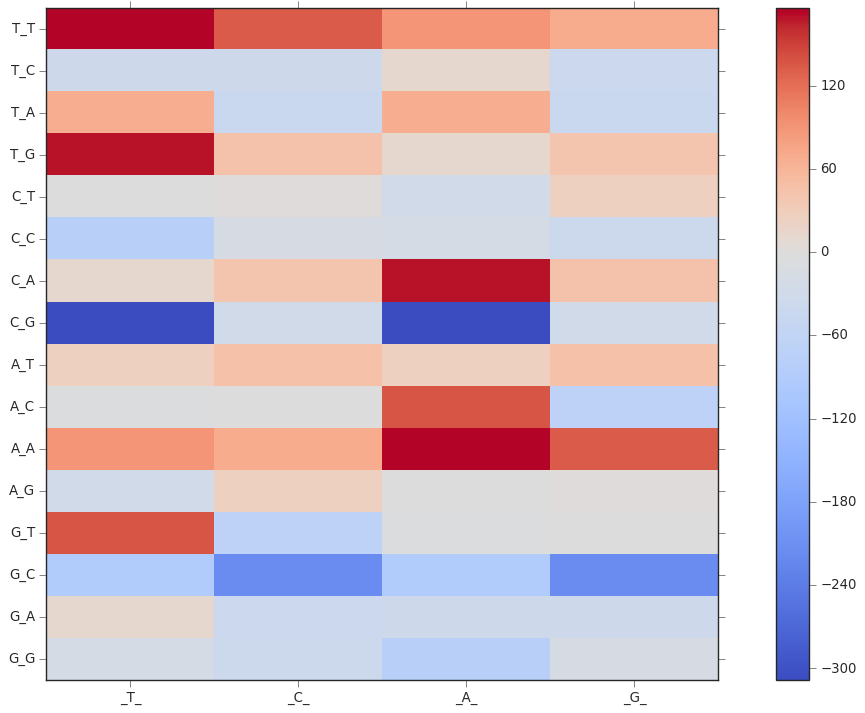

In [583]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(codon_meanChangeCount_array), interpolation="nearest", cmap = shiftedColorMap(matplotlib.cm.coolwarm, codon_meanChangeCount_array), aspect =1/4)
fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(len(base2_axis)))
ax.set_yticks(np.arange(len(base1base3_axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(base2_axis)
ax.set_yticklabels(base1base3_axis)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# for i in range(len(base1base3_axis)):
#     for j in range(len(base2_axis)):
#         text = ax.text(j, i, np.array(codon_array)[i, j],
#                        ha="right", va="center", color="k", size = 16)
        

ax.grid(False)
#ax.set_title("Codon freq chnage heatmap only \n 32 codon data points")
#fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

# ** PLOTTING BY CODON USAGE BIAS ** 

In [145]:
codon_usage_dict = {'AAA': 0.77, 'AAC': 1.0, 'AAG': 1.0, 'AAT': 0.89, 'ACA': 0.81, 'ACC': 1.0, 'ACG': 0.32, 'ACT': 0.7, 'AGA': 1.0, 'AGC': 1.0, 'AGG': 1.0,
 'AGT': 0.62, 'ATA': 0.36, 'ATC': 1.0, 'ATG': 1.0, 'ATT': 0.77, 'CAA': 0.36, 'CAC': 1.0, 'CAG': 1.0, 'CAT': 0.72, 'CCA': 0.83, 'CCC': 1.0, 'CCG': 0.36, 'CCT': 0.87,
 'CGA': 0.51, 'CGC': 0.88, 'CGG': 0.97, 'CGT': 0.38, 'CTA': 0.18, 'CTC': 0.49, 'CTG': 1.0, 'CTT': 0.33, 'GAA': 0.73, 'GAC': 1.0, 'GAG': 1.0, 'GAT': 0.86, 'GCA': 0.56,
 'GCC': 1.0, 'GCG': 0.27, 'GCT': 0.64, 'GGA': 0.73, 'GGC': 1.0, 'GGG': 0.75, 'GGT': 0.47, 'GTA': 0.25, 'GTC': 0.51, 'GTG': 1.0, 'GTT': 0.39, 'TAA': 0.53, 'TAC': 1.0,
 'TAG': 0.43, 'TAT': 0.8, 'TCA': 0.63, 'TCC': 0.9, 'TCG': 0.23, 'TCT': 0.77, 'TGA': 1.0, 'TGC': 1.0, 'TGG': 1.0, 'TGT': 0.84, 'TTA': 0.19, 'TTC': 1.0, 'TTG': 0.32, 'TTT': 0.84} 
# copied form rob notebook 

In [146]:
codon_usage_list = []
for triplet in triplets: 
    codon_usage_list.append(codon_usage_dict[triplet])

In [147]:
rangeSize = max(codon_usage_list) - min(codon_usage_list)
nbin = 4
windowSize = rangeSize/nbin
rangeValues = [min(codon_usage_list)+i*windowSize for i in range(0,nbin+1)]
print(rangeValues)

[0.18, 0.385, 0.5900000000000001, 0.7949999999999999, 1.0]


In [148]:
colour_list_codonUsage = []
for value in codon_usage_list: 
    if value <= rangeValues[1]: 
        colour_list_codonUsage.append("red")
        
    elif value <= rangeValues[2]: 
        colour_list_codonUsage.append("blueviolet")
        
    elif value <= rangeValues[3]: 
        colour_list_codonUsage.append("blue")
        
    elif value >= rangeValues[3]: 
        colour_list_codonUsage.append("mediumturquoise")
    

In [149]:
legendplot = [str(i)[0:4] for i in rangeValues]

red_patch = mpatches.Patch(color='red', label=legendplot[0]+" : "+legendplot[1])
blueviolet_patch = mpatches.Patch(color='blueviolet', label=legendplot[1]+" : "+legendplot[2])
blue_patch = mpatches.Patch(color='blue', label=legendplot[2]+" : "+legendplot[3])
cyan_patch = mpatches.Patch(color='mediumturquoise', label=legendplot[3]+" : "+legendplot[4])

In [410]:
codon_chnage = []
codon_chnage_std = []
for triplet in triplets: 
    codon_chnage.append(np.mean(count_change_dictionary[triplet]))
    codon_chnage_std.append(np.std(count_change_dictionary[triplet])/np.sqrt(12))
    

In [151]:
len(codon_chnage)

64

In [152]:
len(colour_list_codonUsage)

64

In [153]:
len(triplet_muts_intron)

64

In [154]:
len(triplet_chnage_mean_intron)

64

In [155]:
type(triplet_chnage_mean_intron)

list

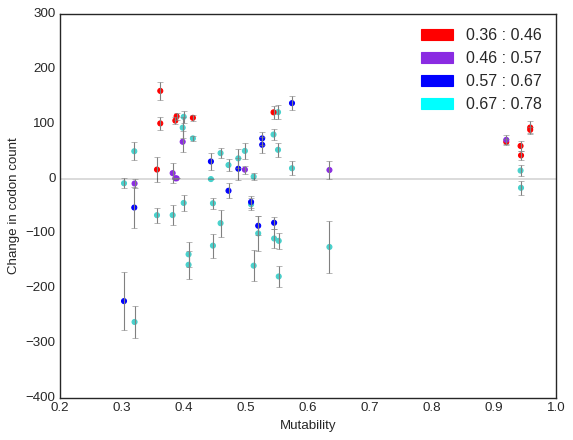

In [412]:
plt.scatter(triplet_muts_intron,codon_chnage, c = colour_list_codonUsage, edgecolors = colour_list_codonUsage)
#plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in codon count")
#plt.title( sim_details+"\n colroing = codon usgae bias \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, codon_chnage, yerr = np.array(codon_chnage_std), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.savefig("Plots/Codon_change_2020_08_11.png")

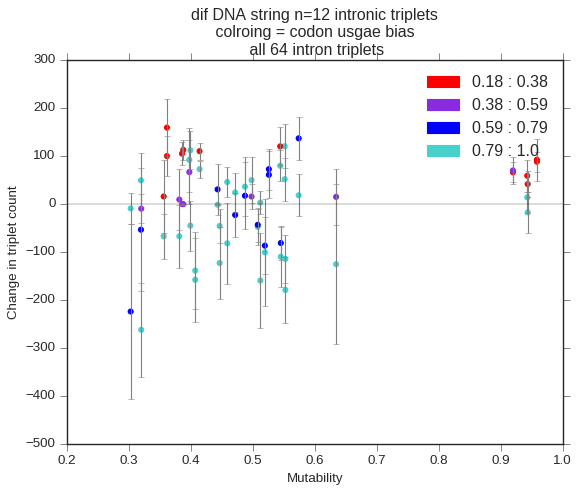

In [157]:
plt.scatter(triplet_muts_intron,codon_chnage, c = colour_list_codonUsage, edgecolors = colour_list_codonUsage)
#plt.scatter(triplet_muts_intron,triplet_chnage_mean_intron)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Mutability")
plt.ylabel("Change in triplet count")
plt.title( sim_details+"\n colroing = codon usgae bias \n all 64 intron triplets")
plt.errorbar(triplet_muts_intron, codon_chnage, yerr = np.array(codon_chnage_std), ecolor = "grey", ls = "None")


plt.legend(handles=[red_patch, blueviolet_patch, blue_patch, cyan_patch])
plt.show()

In [264]:
len(DNA_dataDict["Trial1"][7])

49983

In [265]:
len(DNA_dataDict["Trial1"][6])

49983

In [266]:
len(DNA_dataDict["Trial1"][5])

18052

### ** triplet mutability heat map to start ** 

In [4]:
triplets = []
muts_array = []
bases = ["T", "C", "A", "G"]

for base1 in bases: 

    for base3 in bases:
        triplet_muts_list = []
        
        for base2 in bases: 
            triplet = base1+base2+base3
            if triplet in model: 
                triplet_muts_list.append(model[triplet][0])
            else: 
                triplet_muts_list.append(model[reverse_complement(triplet)][0])
        muts_array.append(triplet_muts_list)
                 
        
        #here is where the last of the list 

In [5]:
base2_axis = ["_"+base+"_" for base in bases]
print(base2_axis)

base1base3_axis = []
for base1 in bases: 
    for base3 in bases: 
        base1base3_axis.append(base1+"_"+base3)
print(base1base3_axis)

['_T_', '_C_', '_A_', '_G_']
['T_T', 'T_C', 'T_A', 'T_G', 'C_T', 'C_C', 'C_A', 'C_G', 'A_T', 'A_C', 'A_A', 'A_G', 'G_T', 'G_C', 'G_A', 'G_G']


In [6]:
#help(ax.imshow)

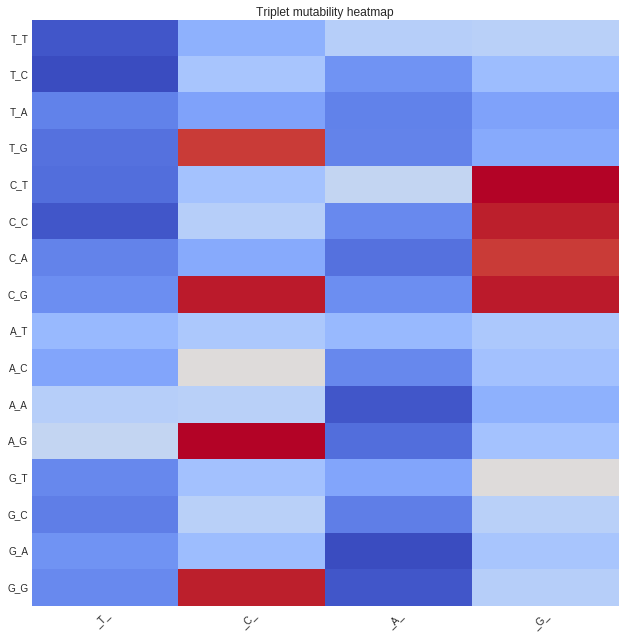

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(muts_array, interpolation="nearest", cmap = "coolwarm", aspect =1/4)

# We want to show all ticks...
ax.set_xticks(np.arange(len(base2_axis)))
ax.set_yticks(np.arange(len(base1base3_axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(base2_axis)
ax.set_yticklabels(base1base3_axis)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.grid(False)
ax.set_title("Triplet mutability heatmap")
#fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()